### Every-visit Monte Carlo with Exploring Starts for estimating an optimal Blackjack policy

This corresponds to the algorithm described in Chapter 5.3 of [_Reinforcement Learning: An Introduction_](http://incompleteideas.net/book/the-book-2nd.html), by Sutton and Barto.

In [31]:
# Dependencies
import pickle
import time

import gym
from tqdm import tqdm

from rl_agents.blackjack.MonteCarloAgent import MonteCarloAgent

### Initialize Blackjack agent and environment

In [32]:
RANDOM_SEED = 2

env = gym.make('Blackjack-v0')
env.seed(seed=RANDOM_SEED)
agent = MonteCarloAgent(action_space=env.action_space,
                        obs_space=env.observation_space,
                        seed=RANDOM_SEED)

### Run Experiment

In [97]:
NUM_EPISODES = 1000000

for i_episode in tqdm(range(NUM_EPISODES)):
    observation = env.reset()
    reward = 0
    done = False
    t = 0
    episode_ts = []
    while not done:
        action = agent.agent_step(reward=reward,
                                  observation=observation)

        observation, reward, done, info = env.step(action)

        episode_ts.append((action, observation, reward))

        if done:
            break

        t += 1

    agent.agent_end(episode_ts=episode_ts)

100%|██████████| 1000000/1000000 [10:55<00:00, 1525.16it/s]


In [100]:
# Save the agent
with open("/home/protoman/dev/rl_agents/rl_agents/blackjack/agents/{}_mc_episodes={}.pkl".format(int(time.time()), NUM_EPISODES), "wb") as fp:
    pickle.dump(agent, fp)

### Analyze agent's policy

In [101]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

x_labels = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
x_title = "Dealer showing"
y_labels = ["11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21"]
y_title = "Player Sum"
policy_values = agent.policy[11:22, :, 0]

In [102]:
def gen_heatmap(values, x_labels, y_labels, x_title, y_title, title):
    fig, ax = plt.subplots()
    
#     im = ax.imshow(policy_values)
    heatmap = ax.pcolor(values)
    cbar = plt.colorbar(heatmap)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_yticks(np.arange(len(y_labels)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)

    ax.set_title(title)
    fig.tight_layout()
    plt.show()

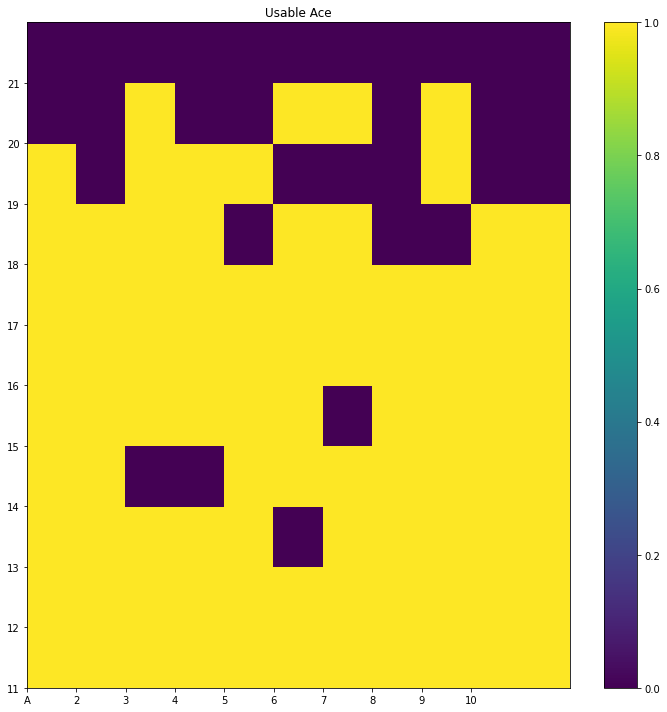

In [103]:
# Has Usable Ace
policy_values = agent.policy[11:22, :, 1]
gen_heatmap(policy_values, x_labels, y_labels, x_title, y_title, "Usable Ace")

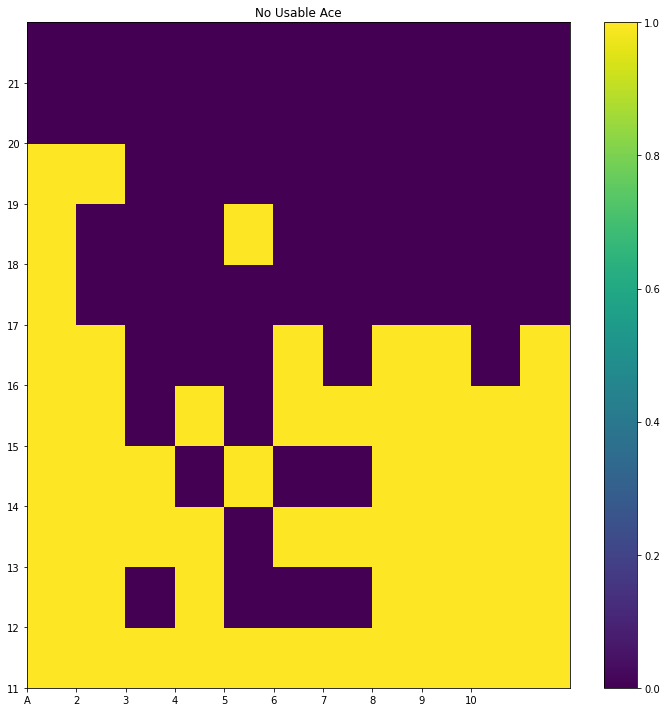

In [104]:
# No Usable Ace
policy_values = agent.policy[11:22, :, 0]
gen_heatmap(policy_values, x_labels, y_labels, x_title, y_title, "No Usable Ace")

In [ ]:
def wireframe_plot(X, Y, Z):
    